<a href="https://colab.research.google.com/github/Flaviofrc97/DATA-SCIENSE-PROJECTS/blob/main/ANALYS_DATASET_OLIST_%5BEDA%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#!pip install wordcloud
#!pip install pandasql

In [11]:
import pandas as pd
import pandasql as psql
from pandasql import sqldf
import numpy as np
import calendar

import seaborn as sns
import matplotlib.pyplot as plt
#from wordcloud import WordCloud

import warnings
warnings.filterwarnings( 'ignore' )

sns.set(style='darkgrid')
plt.rcParams["figure.figsize"] = (15,7)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## LOADING DATA

In [51]:
reviews = pd.read_csv("/content/drive/MyDrive/OLIST_DATASETS/olist_order_reviews_dataset.csv")
products  = pd.read_csv("/content/drive/MyDrive/OLIST_DATASETS/olist_products_dataset.csv")
customers = pd.read_csv("/content/drive/MyDrive/OLIST_DATASETS/olist_customers_dataset.csv")
orders = pd.read_csv("/content/drive/MyDrive/OLIST_DATASETS/olist_orders_dataset.csv")
orders_items = pd.read_csv("/content/drive/MyDrive/OLIST_DATASETS/olist_order_items_dataset.csv")

In [46]:
df_reviews =  psql.sqldf("select * from reviews")
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [31]:
df_customers =  psql.sqldf("select * from customers")
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [23]:
df_products =  psql.sqldf("select * from products")
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [47]:
df_orders =  psql.sqldf("select * from orders")
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [52]:
query = '''SELECT REVISAO.REVIEW_ID,
                  REVISAO.REVIEW_SCORE,
                  REVISAO.REVIEW_COMMENT_TITLE,
                  REVISAO.REVIEW_COMMENT_MESSAGE,
                  REVISAO.REVIEW_CREATION_DATE,
                  PEDIDOS.ORDER_STATUS,
                  PEDIDOS.ORDER_APPROVED_AT,
                  PEDIDOS.ORDER_DELIVERED_CARRIER_DATE,
                  PEDIDOS.ORDER_ESTIMATED_DELIVERY_DATE,
                  CLIENTES.CUSTOMER_STATE,
                  PRODUTOS.PRODUCT_CATEGORY_NAME
           FROM reviews REVISAO
                INNER JOIN orders PEDIDOS
                ON REVISAO.ORDER_ID = PEDIDOS.ORDER_ID
                INNER JOIN customers CLIENTES
                ON CLIENTES.CUSTOMER_ID = PEDIDOS.CUSTOMER_ID
                INNER JOIN orders_items ITENS 
                ON PEDIDOS.ORDER_ID = ITENS.ORDER_ID
                INNER JOIN products PRODUTOS 
                ON PRODUTOS.PRODUCT_ID = ITENS.PRODUCT_ID'''

In [56]:
df = psql.sqldf(query)

## DATA DESCRIPTION 

In [57]:
df.shape

(113322, 11)

In [58]:
df.isna().sum()

review_id                            0
review_score                         0
review_comment_title             99700
review_comment_message           64730
review_creation_date                 0
order_status                         0
order_approved_at                   15
order_delivered_carrier_date      1203
order_estimated_delivery_date        0
customer_state                       0
product_category_name             1612
dtype: int64

In [59]:
df.dtypes

review_id                        object
review_score                      int64
review_comment_title             object
review_comment_message           object
review_creation_date             object
order_status                     object
order_approved_at                object
order_delivered_carrier_date     object
order_estimated_delivery_date    object
customer_state                   object
product_category_name            object
dtype: object

In [60]:
df.columns

Index(['review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date', 'order_status',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_estimated_delivery_date', 'customer_state',
       'product_category_name'],
      dtype='object')

## PREPROCESSING

In [61]:
df1 = df.copy()

In [62]:
df1.head()

,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,order_status,order_approved_at,order_delivered_carrier_date,order_estimated_delivery_date,customer_state,product_category_name
0,7bc2406110b926393aa56f80a40eba40,4,None,None,2018-01-18 00:00:00,delivered,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-02-02 00:00:00,SP,esporte_lazer
1,7bc2406110b926393aa56f80a40eba40,4,None,None,2018-01-18 00:00:00,delivered,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-02-02 00:00:00,SP,esporte_lazer
2,80e641a11e56f04c1ad469d5645fdfde,5,None,None,2018-03-10 00:00:00,delivered,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-14 00:00:00,SP,informatica_acessorios
3,228ce5500dc1d8e020d8d1322874b6f0,5,None,None,2018-02-17 00:00:00,delivered,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-03-09 00:00:00,BA,informatica_acessorios
4,e64fb393e7b32834bb789ff8bb30750e,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,delivered,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-05-10 00:00:00,SC,ferramentas_jardim


In [63]:
%%time

df1 = df1.drop_duplicates()

# rename columns
cols = ['review_id', 'score', 'review_title', 'review_message', 'review_date',
        'order_status', 'order_approved','delivered_carrier','estimated_delivery',
        'customer_state', 'product_category']
df1.columns = map(str.lower, cols)

#Change types 
df1['score'] = df1['score'].astype(int)

# Parse Dates to datetime pandas
for col in df1[['review_date', 'order_approved','delivered_carrier','estimated_delivery']]:
    df1[col] = pd.to_datetime(df1[col])

# check if there is a empty values. If true, fill With NaN
for col in df1:
    df1[col] = df1[col].apply(lambda x: np.nan if x == '' else x )
    
#ordering columns
df1 = df1[['review_id','review_date', 'order_approved','delivered_carrier','estimated_delivery', 
            'product_category','order_status','review_title', 'review_message','customer_state','score']]

CPU times: user 2.49 s, sys: 50.3 ms, total: 2.54 s
Wall time: 2.55 s


In [64]:
df1.isna().sum()

review_id                 0
review_date               0
order_approved           14
delivered_carrier      1018
estimated_delivery        0
product_category       1460
order_status              0
review_title          88243
review_message        58317
customer_state            0
score                     0
dtype: int64

In [65]:
df1.sample(3)

,review_id,review_date,order_approved,delivered_carrier,estimated_delivery,product_category,order_status,review_title,review_message,customer_state,score
39838,cccba75094774cb11c191b76c3ba5923,2017-12-06,2017-11-22 10:59:23,2017-11-23 17:26:43,2017-12-12,informatica_acessorios,delivered,None,None,SP,5
18409,f3669636a59b47fd26fd65a6509a21ea,2018-01-12,2018-01-06 21:46:48,2018-01-08 21:29:31,2018-01-31,esporte_lazer,delivered,None,Produto esta de acordo com o que foi divulgado.,SP,5
93905,761754f0b80840915a8c95318db1c760,2017-09-23,2017-09-20 13:55:16,2017-09-21 18:55:05,2017-10-05,fashion_bolsas_e_acessorios,delivered,None,Bem foi presente e a pessoa gostou.,SP,4


# EXLORATORY DATA ANALYSIS

0. Scores
1. Quais categorias de protudos há mais vendas?
2. Quais categorias de produtos tem menor nota de score? 
3. Quais Estados há mais vendas?
4. O Tempo de entrega intefere no score?
4. Quais Estados tem a menor nota de score?
5. O Estado interfere no tepo de entrega?
6. o tempo de entrega é maior do que o tempo estimado? Se for, isso interfere no score?


### 0. SCORES

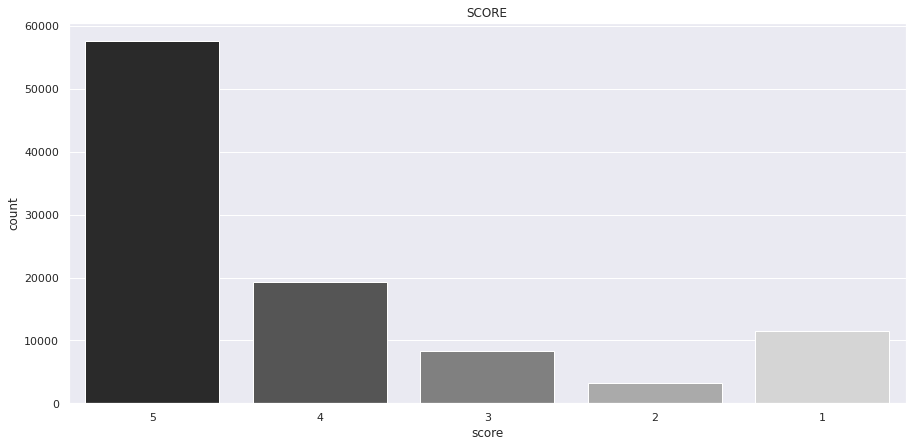

In [85]:
sns.countplot(x='score', data=df1, palette='gist_yarg_r', order=[5,4,3,2,1])
plt.title("SCORE", size=12);

## 1.  Quais categorias de protudos há mais vendas?

In [67]:
mais_vendidos = df1.groupby(['product_category'], as_index=False)['customer_state'].count().rename( columns = {'customer_state':'total'})
# calculo porcentagem
mais_vendidos['%'] = round((mais_vendidos['total'] / mais_vendidos['total'].sum()) * 100, 2)
mais_vendidos.nlargest(3, 'total')

,product_category,total,%
13,cama_mesa_banho,9538,9.68
11,beleza_saude,8892,9.02
32,esporte_lazer,7772,7.88


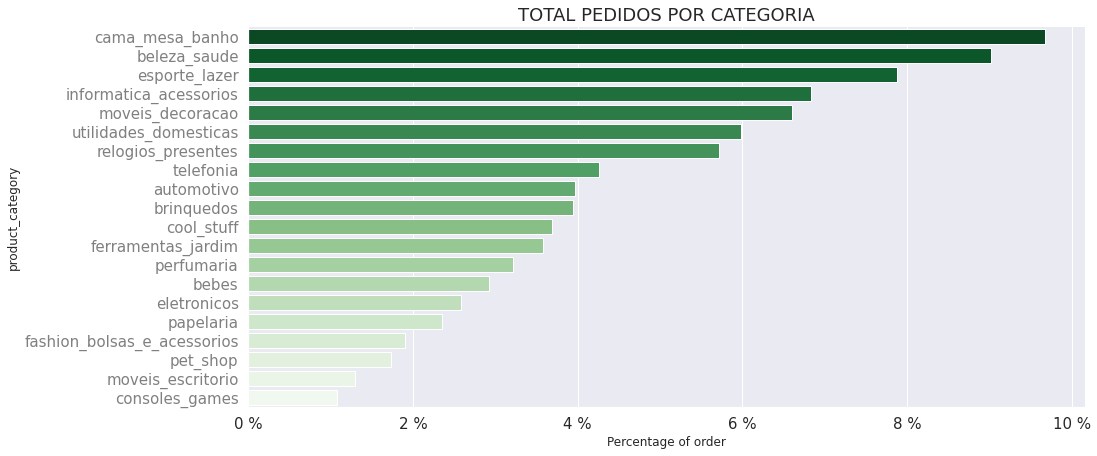

In [87]:
g = sns.barplot(y='product_category', x='%', palette='Greens_r', data=mais_vendidos.nlargest(20, '%'))

plt.title('TOTAL PEDIDOS POR CATEGORIA', size=18)
plt.yticks(fontsize=15, color='gray');
plt.xticks([0,2,4,6,8,10],['0 %', '2 %', '4 %', '6 %', '8 %', '10 %'], fontsize=15);
plt.xlabel("Percentage of order");
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)

Podemos ver no gráfico as categorias dos produtos e suas respectivas participações no número do total de pedidos. Percebe-se que é bem diversificado o portifólio de produtos da empresa, cujo o valor do produto como maior particpação é cama_mesa_banho e  não ultrapassa os 10% do total dos pedidos. Sendo assim, qualquer problema que impacte as vendas em determinada categoria, não causaria diminuição tão acententuada no faturamento da empresa.

### 2. NOTA DE SCORE POR CATEGORIA DE PRODUTO

In [69]:
def count_product_category(score, data, x, y, n = 20):
    #filtrando o dataframe por score, para gerar o grafico para cada um
    data = data[ data['score'] == score ]
    
    #agrupanda valores por coluna (que será passa como argumento para a função) e calculando o total
    count = data.groupby(col, as_index=False)['customer_state'].count().rename( columns = {'customer_state':'total'})
    
    #calculando a parcentagem de cada valor do total calculado acima
    count['%'] = round((count['total'] / count['total'].sum()) * 100, 2)
    
    #por fim, gerando os graficos com os argumentos da função
    g = sns.barplot(x=x, y =y, data = count.nlargest(n, 'total'), palette='icefire_r')
    
    # config plot area
    plt.title(f'score {score} by {col}', size=13,  fontweight="bold")
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    plt.subplots_adjust(left=0.1, 
                    bottom=0.3,  
                    right=0.9,  
                    top=1.9,  
                    wspace=0.4,  
                   hspace=1)
    return g

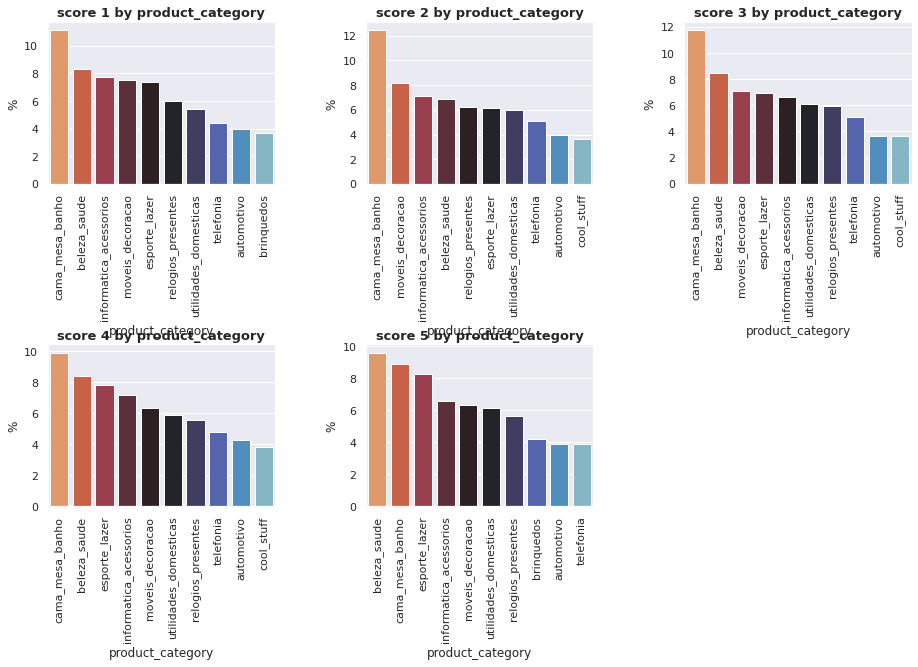

In [70]:
for i in range(1,6):
    plt.subplot( 3, 3, i );
    count_product_category(i, df1, 'product_category', '%', 10);
    plt.xticks(rotation=90);

A Categoria Cama_mesa_banho aprece em primeiro lugar em todas as faixas de scores. Obviamente, isso se deve a quantidade de peidos para esta categoria. Quanto maior o número de pedidos para uma categoria, a probabildaide de aparecer em todas as faixas de scores é tende as ser maior. o Ponto positivo é a categoria beleza_saude, que ocupa o primeiro lugar na faixa de score 5.

### 3. Quais Estados há mais Pedidos?

In [71]:
df1.sample()

,review_id,review_date,order_approved,delivered_carrier,estimated_delivery,product_category,order_status,review_title,review_message,customer_state,score
63484,111458efc80255e6b121e32fe2fc0459,2018-01-24,2018-01-03 20:46:43,2018-01-09 00:12:58,2018-02-06,papelaria,delivered,None,None,RJ,5


In [72]:
def count_order_by_state(col, data, y, n = 20):
    count = data.groupby(col, as_index=False)['order_status'].count().rename( columns = {'order_status':'total'})
    count['%'] = round((count['total'] / count['total'].sum()) * 100, 2)
    
    g = sns.barplot(x=col, y =y, data = count.nlargest(n, 'total'), palette='Greys_r')
    
    col = col.replace("_", " ")
    plt.title(f' Total order by {col}', size=18,  fontweight="bold")
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    return g

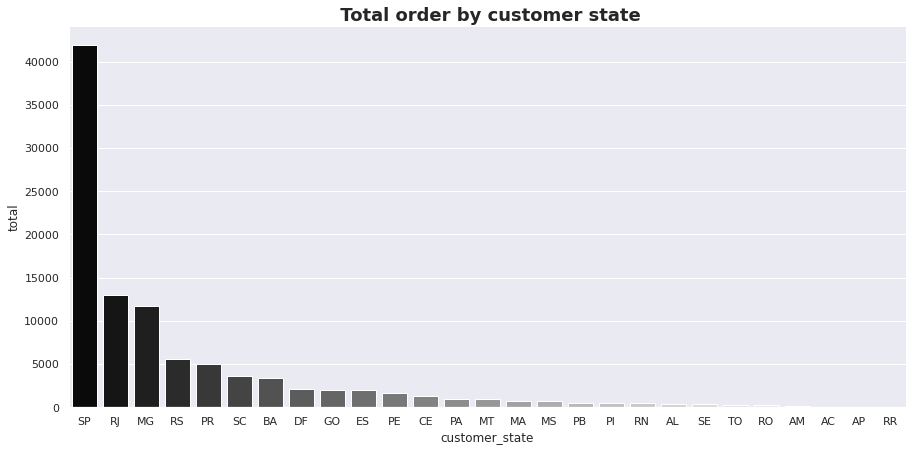

In [73]:
count_order_by_state('customer_state', df1, 'total', 27);

### 4. O Tempo de entrega interfere no score?

In [74]:
df_delivery = df1.copy()

In [75]:
df_delivery = df_delivery.dropna()

Analisando os dados, percebe-se as entregas são feitas quase que unanimemente dentro do próprio mês. Portanto, analisarei as difrenças entre os dias.


In [76]:
%%time

# Irei criar uma função simples para calcular quantos dias demoraram para fazer a entrega (delivered_carrier - order_approved)
def days_to_delivery(data):
    # Se a entrega foI realizada dentro do mesmo mês:
    if data['delivered_carrier'].month == data['order_approved'].month:
        if data['delivered_carrier'].day < data['order_approved'].day:
            return np.nan # Em alguns casos há erro nos dados, em que o dia da entrega é menor que o dia da aprovaçãodo pedido.
        else: 
            return data['delivered_carrier'].day - data['order_approved'].day
    
    # Se foi realizada em meses diferenes, é necessário calcular primero os dias separadamente de cada mês e depois somá-los.
    elif data['delivered_carrier'].month != data['order_approved'].month:
        if data['delivered_carrier'].month < data['order_approved'].month or data['delivered_carrier'].day < data['order_approved'].day:
            return np.nan
        else:
            return (pd.Period(data['order_approved'], freq='D').days_in_month - data['order_approved'].day) + data['delivered_carrier'].day

    
df_delivery['days_to_delivery'] = df_delivery.apply(days_to_delivery, axis=1)

CPU times: user 514 ms, sys: 3.84 ms, total: 518 ms
Wall time: 524 ms


In [77]:
# ANALISANDO A BASE, PERCEBE-SE QUE HÁ DIVERGENCIAS ENTRE AS DATAS. SENDO ASSIM,
#TODAS AS DADOS DIVERGENTES FORAM PREENCHIDAAS COM NAN PARA QUE SEJAM TRATADAS POSTERIOMENTE.

def highlight_cols(s):
    color = 'orange'
    return 'background-color: %s' % color

df_delivery[df_delivery['days_to_delivery'].isna()].head(2)\
.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['order_approved', 'delivered_carrier']])

,review_id,review_date,order_approved,delivered_carrier,estimated_delivery,product_category,order_status,review_title,review_message,customer_state,score,days_to_delivery
51,b193ff3c9f32a01f3a0d9ae26b94d244,2018-08-10 00:00:00,2018-07-30 09:50:20,2018-08-01 15:24:00,2018-08-17 00:00:00,perfumaria,delivered,Maravilhoso!,"Tô completamente apaixonada, loja super responsável e confiável!",PE,5,nan
245,5241fcad10d7b45a1761f1e1e1536faa,2018-07-07 00:00:00,2018-06-26 09:52:56,2018-07-03 09:39:00,2018-07-26 00:00:00,cama_mesa_banho,delivered,super recomendo,"chegou dentro do prazo e o produto é de excelente qualidade! Acabou as dores nas costas, estou dormindo muito bem!",RJ,5,nan


A base tem alguns valores com tempo de entrega negativo, o que pode indicar 3 coisas: 

1º Há algo deu errado no cálculo que fiz e preciso conferir;

2º As datas estão erradas na base de dados, causando essa distorção no tempo de entrega;

3º A transportadora fez um trabalho íncrivel e voltou no tempo para fazer a entrega - acho improvável.

### Fill NAN WITH MEAN OF DAYS TO DELIVERY

In [78]:
# salvando o index das linhas nan, para poder filtrar e conferir se os valores medios foram imputados corretamento.
list_index = list(df_delivery[df_delivery['days_to_delivery'].isna() ].index)

In [91]:
# Preenchendo NaN com o tempo - em dias - medio de entrega de acordo com o Estado.

df_delivery['days_to_delivery'] = df_delivery.groupby(['customer_state'])['days_to_delivery']\
.transform(lambda x: x.fillna( abs(x.mean()) ))

In [93]:
df_delivery[df_delivery.index.isin(list_index)].head(2)

,review_id,review_date,order_approved,delivered_carrier,estimated_delivery,product_category,order_status,review_title,review_message,customer_state,score,days_to_delivery
51,b193ff3c9f32a01f3a0d9ae26b94d244,2018-08-10,2018-07-30 09:50:20,2018-08-01 15:24:00,2018-08-17,perfumaria,delivered,Maravilhoso!,"Tô completamente apaixonada, loja super respon...",PE,5,2.30
245,5241fcad10d7b45a1761f1e1e1536faa,2018-07-07,2018-06-26 09:52:56,2018-07-03 09:39:00,2018-07-26,cama_mesa_banho,delivered,super recomendo,chegou dentro do prazo e o produto é de excele...,RJ,5,2.16


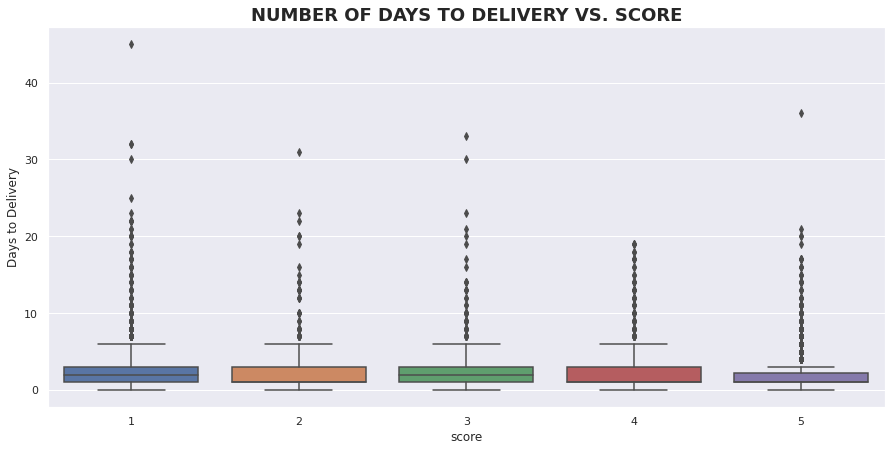

In [82]:
sns.boxplot(y='days_to_delivery', x='score', data=df_delivery);
plt.title('NUMBER OF DAYS TO DELIVERY VS. SCORE', size = 18, fontweight="bold");
plt.ylabel("Days to Delivery");

In [83]:
df_outlier_devlivery = df_delivery[df_delivery['days_to_delivery'] > 10 ]

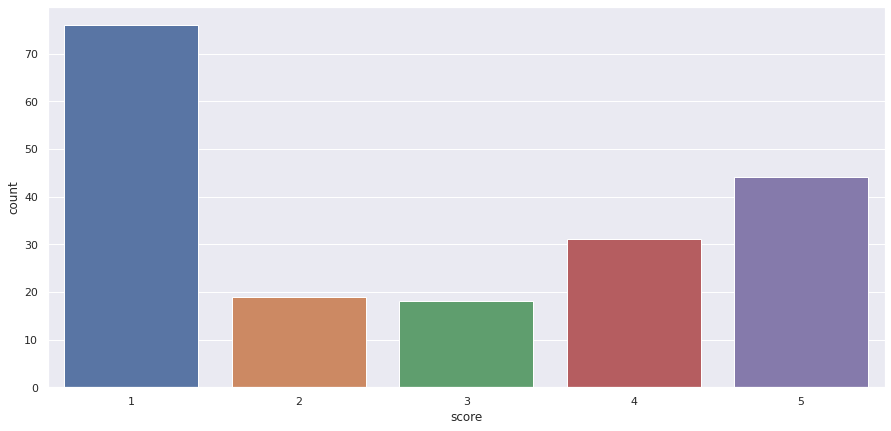

In [84]:
sns.countplot(x='score', data=df_outlier_devlivery)

#**Continue...**